In [113]:
import pandas as pd

## Milestone 3 - Data Preparation

### Task 1

In [ ]:
'''
def remove_rows_with_missing_ratings()
removes the rows with missing values in these columns. 
It should take in the dataset as a pandas dataframe and return the same type.

def combine_description_strings() 
The "Description" column contains lists of strings. 
Pandas recognises these as strings containing python lists
1. Remove records with a missing description.
2. Remove the 'About this space' prefix which every description starts with.
3. Remove empty quotes from lists.
3. Combine/ join the list items into one string.
It should take in the dataset as a pandas dataframe and return the same type.

def set_default_feature_values()
Replace entries with empty values with the number 1. 
It should take in the dataset as a pandas dataframe and return the same type.

def clean_tabular_data()
Takes in the raw data frame.
calls the three functions above sequentially 
on the output of the previous one, 
and returns the processed data.

if __name__ == "__main__"
1. Load the raw data in using pandas
2. Call clean_tabular_data on it
3. Save the processed data as clean_tabular_data.csv in the same folder 
as you found the raw tabular data.


'''

In [114]:
tabular_data_df = pd.read_csv('listing.csv')
tabular_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    988 non-null    object 
 1   Category              988 non-null    object 
 2   Title                 988 non-null    object 
 3   Description           900 non-null    object 
 4   Amenities             988 non-null    object 
 5   Location              988 non-null    object 
 6   guests                969 non-null    object 
 7   beds                  945 non-null    float64
 8   bathrooms             888 non-null    float64
 9   Price_Night           988 non-null    int64  
 10  Cleanliness_rating    890 non-null    float64
 11  Accuracy_rating       890 non-null    float64
 12  Communication_rating  890 non-null    float64
 13  Location_rating       890 non-null    float64
 14  Check-in_rating       890 non-null    float64
 15  Value_rating          8

In [93]:
tabular_data_df.isna().sum()

ID                        0
Category                  0
Title                     0
Description              88
Amenities                 0
Location                  0
guests                   19
beds                     43
bathrooms               100
Price_Night               0
Cleanliness_rating       98
Accuracy_rating          98
Communication_rating     98
Location_rating          98
Check-in_rating          98
Value_rating             98
amenities_count           0
url                       0
bedrooms                 82
Unnamed: 19             987
dtype: int64

In [94]:
tabular_data_df.dtypes

ID                       object
Category                 object
Title                    object
Description              object
Amenities                object
Location                 object
guests                   object
beds                    float64
bathrooms               float64
Price_Night               int64
Cleanliness_rating      float64
Accuracy_rating         float64
Communication_rating    float64
Location_rating         float64
Check-in_rating         float64
Value_rating            float64
amenities_count         float64
url                      object
bedrooms                 object
Unnamed: 19             float64
dtype: object

In [95]:
tabular_data_df.dropna(subset=['Cleanliness_rating', 'Accuracy_rating', 'Communication_rating', 'Location_rating', 'Check-in_rating', 'Value_rating'], inplace=True)

In [96]:
tabular_data_df.isna().sum()

ID                        0
Category                  0
Title                     0
Description              60
Amenities                 0
Location                  0
guests                   18
beds                     34
bathrooms                79
Price_Night               0
Cleanliness_rating        0
Accuracy_rating           0
Communication_rating      0
Location_rating           0
Check-in_rating           0
Value_rating              0
amenities_count           0
url                       0
bedrooms                 76
Unnamed: 19             889
dtype: int64

In [69]:
description_df = tabular_data_df['Description']
description_df

0      ['About this space', "Escape to one of these t...
1      ['About this space', "Come and spend a romanti...
2      ['About this space', 'Rustic cabin between the...
3      ['About this space', 'The Tree top cabin is si...
5      ['About this space', 'Charming cabin nestled i...
                             ...                        
982    ['About this space', 'An apartment directly on...
983    ['About this space', 'Light roomy space with o...
984    ['About this space', 'This specious two bedroo...
985    ['About this space', 'With all the modern amen...
987    ['About this space', 'Sea Scenes is a homely t...
Name: Description, Length: 890, dtype: object

In [70]:
type(description_df.loc[982])

str

In [71]:
type(description_df.loc[982])

str

In [88]:
tabular_data_df.dropna(subset=['Description'], inplace=True)


In [89]:
tabular_data_df.isna().sum()

ID                        0
Category                  0
Title                     0
Description               0
Amenities                 0
Location                  0
guests                   15
beds                     29
bathrooms                65
Price_Night               0
Cleanliness_rating        0
Accuracy_rating           0
Communication_rating      0
Location_rating           0
Check-in_rating           0
Value_rating              0
amenities_count           0
url                       0
bedrooms                 70
Unnamed: 19             829
dtype: int64

In [90]:
tabular_data_df['Description'].loc[0]

'[\'About this space\', "Escape to one of these two fabulous Tree Tents. Suspended high above the canopy, it’s time to appreciate life from a new perspective. Featured on George Clarke’s Amazing Spaces, these Tree Tents are a feat of aviation technology. Tree Tent comes complete with fire pit, outdoor kitchen and shower with hot water. You’ll discover a comfortable bed and cosy wood burning stove. Part of the Red Kite Estate, along with our barn and its sister tree tent, the first ever built in the UK, Dragon\'s Egg.", \'The space\', \'The space\\nThe true joy of this place is how wonderfully simple it is (aviation technology aside). Days are filled with fireside discussions, wildlife watching and stunningly beautiful walks. With the nearest mobile signal a ten minute walk away, it’s a great place to ditch the digital and truly escape. Head over the bridge to your own private deck that happily houses a clever outdoor-kitchen and shower (complete with hot water). It’s the perfect spot t

In [75]:
type(tabular_data_df['Description'].loc[0])

str

In [76]:
from ast import literal_eval

def clean_description_strings(text):
    try:
        description_list = literal_eval(text)
        description_list.remove('About this space')
        description_list = ''.join(description_list)
        return description_list
    except Exception as e:
        return text
        


tabular_data_df['Description'] = tabular_data_df['Description'].apply(clean_description_strings) 
    
tabular_data_df['Description']



0      Escape to one of these two fabulous Tree Tents...
1      Come and spend a romantic stay with a couple o...
2      Rustic cabin between the pines, 3 meters high ...
3      The Tree top cabin is situated in our peaceful...
5      Charming cabin nestled in the leaves, real unu...
                             ...                        
982    An apartment directly on the beach at Lancing,...
983    Light roomy space with outside garden 5 minute...
984    This specious two bedroom flat on the sea fron...
985    With all the modern amenities, our contemporar...
987    Sea Scenes is a homely two bedroom groundfloor...
Name: Description, Length: 830, dtype: object

In [77]:
tabular_data_df['Description'].replace([r"\\n", "\n", r"\'"], [" "," ",""], regex=True, inplace=True)

In [78]:
tabular_data_df['Description'].loc[0]

'Escape to one of these two fabulous Tree Tents. Suspended high above the canopy, it’s time to appreciate life from a new perspective. Featured on George Clarke’s Amazing Spaces, these Tree Tents are a feat of aviation technology. Tree Tent comes complete with fire pit, outdoor kitchen and shower with hot water. You’ll discover a comfortable bed and cosy wood burning stove. Part of the Red Kite Estate, along with our barn and its sister tree tent, the first ever built in the UK, Dragons Egg.The spaceThe space The true joy of this place is how wonderfully simple it is (aviation technology aside). Days are filled with fireside discussions, wildlife watching and stunningly beautiful walks. With the nearest mobile signal a ten minute walk away, it’s a great place to ditch the digital and truly escape. Head over the bridge to your own private deck that happily houses a clever outdoor-kitchen and shower (complete with hot water). It’s the perfect spot to fry up breakfast whilst basking in pe

In [ ]:
from ast import literal_eval

tabular_data_df['Description'] = tabular_data_df['Description'].apply(lambda x : literal_eval(str(x)))


In [ ]:
from ast import literal_eval

def literal_return(val):
    try:
        return literal_eval(val)
    except ValueError:
        return (val)

tabular_data_df['Description'] = tabular_data_df['Description'].apply(literal_return)

In [115]:
tabular_data_df[['guests','beds','bathrooms','bedrooms']]

,guests,beds,bathrooms,bedrooms
0,2,1.0,1.0,NaN
1,3,3.0,0.0,1
2,4,2.0,1.5,1
3,2,NaN,1.0,NaN
4,2,1.0,NaN,1
...,...,...,...,...
983,2,1.0,1.0,1
984,4,2.0,1.5,2
985,6,3.0,2.0,2
986,10,7.0,5.0,5


In [116]:
values = {"guests": 1, "beds": 1, "bathrooms": 1, "bedrooms": 1}
tabular_data_df.fillna(value=values, inplace=True)


In [117]:
tabular_data_df[['guests','beds','bathrooms','bedrooms']]

,guests,beds,bathrooms,bedrooms
0,2,1.0,1.0,1
1,3,3.0,0.0,1
2,4,2.0,1.5,1
3,2,1.0,1.0,1
4,2,1.0,1.0,1
...,...,...,...,...
983,2,1.0,1.0,1
984,4,2.0,1.5,2
985,6,3.0,2.0,2
986,10,7.0,5.0,5


In [ ]:
class Clean_airbnb_tabular_data:
    # don't forget init method!

    def remove_rows_with_missing_ratings(self):
        tabular_data_df.dropna(subset=['Cleanliness_rating', 'Accuracy_rating', 'Communication_rating', 'Location_rating', 'Check-in_rating', 'Value_rating'], inplace=True)
        print(tabular_data_df.isna().sum())
        return tabular_data_df

    def combine_description_strings():
        
        
        

        
        

    



        
        
def clean_description_strings(text):
    try:
        description_list = literal_eval(text)
        description_list.remove('About this space')
        description_list = ''.join(description_list)
        return description_list
    except Exception as e:
        return text
        


tabular_data_df['Description'] = tabular_data_df['Description'].apply(clean_description_strings) 
    
tabular_data_df['Description']















if __name__ == "__main__":
    tabular_data_df = pd.read_csv('listing.csv')


### Task 1 - Final solution

In [2]:
from ast import literal_eval
import pandas as pd


class Data_Preparation:
    # def __init__(self):
        

    def remove_rows_with_missing_ratings(self):
        airbnb_df.dropna(subset=['Cleanliness_rating', 'Accuracy_rating', 'Communication_rating', 'Location_rating', 'Check-in_rating', 'Value_rating'], inplace=True)
        return airbnb_df

    def clean_description_strings(self, text):
        try:
            description_list = literal_eval(text)
            description_list.remove('About this space')
            description_list = ''.join(description_list)
            return description_list
        except Exception as e:
                return text 

    def combine_description_strings(self):
        airbnb_df.dropna(subset=['Description'], inplace=True)
        airbnb_df['Description'] = airbnb_df['Description'].apply(self.clean_description_strings) 
        airbnb_df['Description'].replace([r"\\n", "\n", r"\'"], [" "," ",""], regex=True, inplace=True)
        return airbnb_df
      
    def set_default_feature_values(self):
        values = {"guests": 1, "beds": 1, "bathrooms": 1, "bedrooms": 1}
        airbnb_df.fillna(value=values, inplace=True)
        return airbnb_df

    def clean_tabular_data(self):
        self.remove_rows_with_missing_ratings()
        self.combine_description_strings()
        self.set_default_feature_values()

if __name__ == '__main__':
    airbnb_df = pd.read_csv('/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_datasets/listing.csv', index_col='ID')
    airbnb_df.drop('Unnamed: 19', axis=1, inplace=True)
    Data_processor = Data_Preparation()
    Data_processor.clean_tabular_data()



    airbnb_df.to_csv(r'/Users/apple/Documents/GitHub/Data_Science_Airbnb/clean_tabular_data.csv') 


In [3]:
airbnb_df

,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms
ID,,,,,,,,,,,,,,,,,,
f9dcbd09-32ac-41d9-a0b1-fdb2793378cf,Treehouses,Red Kite Tree Tent - Ynys Affalon,Escape to one of these two fabulous Tree Tents...,"['What this place offers', 'Bathroom', 'Shampo...",Llandrindod Wells United Kingdom,2,1.0,1.0,105,4.6,4.7,4.3,5.0,4.3,4.3,13.0,https://www.airbnb.co.uk/rooms/26620994?adults...,1
1b4736a7-e73e-45bc-a9b5-d3e7fcf652fd,Treehouses,Az Alom Cabin - Treehouse Tree to Nature Cabin,Come and spend a romantic stay with a couple o...,"['What this place offers', 'Bedroom and laundr...",Guyonvelle Grand Est France,3,3.0,0.0,92,4.3,4.7,4.6,4.9,4.7,4.5,8.0,https://www.airbnb.co.uk/rooms/27055498?adults...,1
d577bc30-2222-4bef-a35e-a9825642aec4,Treehouses,Cabane Entre Les Pins\n🌲🏕️🌲,"Rustic cabin between the pines, 3 meters high ...","['What this place offers', 'Scenic views', 'Ga...",Duclair Normandie France,4,2.0,1.5,52,4.2,4.6,4.8,4.8,4.8,4.7,51.0,https://www.airbnb.co.uk/rooms/51427108?adults...,1
ca9cbfd4-7798-4e8d-8c17-d5a64fba0abc,Treehouses,Tree Top Cabin with log burner & private hot tub,The Tree top cabin is situated in our peaceful...,"['What this place offers', 'Bathroom', 'Hot wa...",Barmouth Wales United Kingdom,2,1.0,1.0,132,4.8,4.9,4.9,4.9,5.0,4.6,23.0,https://www.airbnb.co.uk/rooms/49543851?adults...,1
cfe479b9-c8f8-44af-9bc6-46ede9f14bb5,Treehouses,Treehouse near Paris Disney,"Charming cabin nestled in the leaves, real unu...","['What this place offers', 'Bathroom', 'Hair d...",Le Plessis-Feu-Aussoux Île-de-France France,4,3.0,1.0,143,5.0,4.9,5.0,4.7,5.0,4.7,32.0,https://www.airbnb.co.uk/rooms/935398?adults=1...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfbc88da-e88c-415a-b397-108d0948c4ba,Beachfront,Lancing Beach Apartment,"An apartment directly on the beach at Lancing,...","['What this place offers', 'Bathroom', 'Hair d...",Lancing United Kingdom,4,2.0,1.5,240,4.9,5.0,5.0,5.0,4.9,4.8,33.0,https://www.airbnb.co.uk/rooms/12680472?adults...,2
4fea5054-f999-4c07-addc-67e4d893deab,Beachfront,Apartment,Light roomy space with outside garden 5 minute...,"['What this place offers', 'Bathroom', 'Hair d...",Brighton and Hove England United Kingdom,2,1.0,1.0,78,4.8,5.0,4.9,4.9,5.0,4.9,54.0,https://www.airbnb.co.uk/rooms/48565992?adults...,1
282118e2-049e-4d9f-b2f2-b47477881b07,Beachfront,Sea front flat with a stunning view!,This specious two bedroom flat on the sea fron...,"['What this place offers', 'Scenic views', 'Be...",East Sussex England United Kingdom,4,2.0,1.5,113,4.8,5.0,5.0,5.0,5.0,4.8,38.0,https://www.airbnb.co.uk/rooms/49742544?adults...,2


## Task 3

In [4]:
def load_airbnb(label:str, df):
    features=df.drop(label, axis=1)
    labels=df[label]
    features = features.select_dtypes(include =['float64', 'int64'])
    return(features, labels)
    


X,y = load_airbnb('Price_Night', airbnb_df)

print(X)
y.shape









                                      beds  bathrooms  Cleanliness_rating  \
ID                                                                          
f9dcbd09-32ac-41d9-a0b1-fdb2793378cf   1.0        1.0                 4.6   
1b4736a7-e73e-45bc-a9b5-d3e7fcf652fd   3.0        0.0                 4.3   
d577bc30-2222-4bef-a35e-a9825642aec4   2.0        1.5                 4.2   
ca9cbfd4-7798-4e8d-8c17-d5a64fba0abc   1.0        1.0                 4.8   
cfe479b9-c8f8-44af-9bc6-46ede9f14bb5   3.0        1.0                 5.0   
...                                    ...        ...                 ...   
cfbc88da-e88c-415a-b397-108d0948c4ba   2.0        1.5                 4.9   
4fea5054-f999-4c07-addc-67e4d893deab   1.0        1.0                 4.8   
282118e2-049e-4d9f-b2f2-b47477881b07   2.0        1.5                 4.8   
9ebf9cec-624e-480e-8704-dffa7cb1fe51   3.0        2.0                 4.7   
d2b06c80-c643-485d-a24b-15d0811a3166   2.0        1.0                 4.9   

(830,)

# Milestone 4

### Task 1

In [12]:
# Start by importing your load_airbnb function defined earlier and using it to load in a dataset with the price per night ("Price_Night") as the label. At this point, it should only include numerical values. You will use the other modes of data later.
# Use sklearn to train a linear regression model to predict the "Price_Night" feature from the tabular data. You should find and use the built in model class SGDRegressor provided by sklearn instead of building your own from scratch.
# The point of this task is to get a baseline to compare other more advanced models to, and to try to improve upon.

from sklearn.linear_model import SGDRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X,y = load_airbnb('Price_Night', airbnb_df)

print(f"Number of samples in dataset: {len(X)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")



Number of samples in dataset: 830
Number of samples in:
    Training: 581
    Testing: 249


In [13]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size=0.5
)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Validation: {len(y_validation)}")
print(f"    Testing: {len(y_test)}")

Number of samples in:
    Training: 581
    Validation: 125
    Testing: 124


In [15]:
data_sets = [X_train, y_train, X_test, y_test, X_validation, y_validation]

print(f"    Training: {len(y_train)}")
print(f"    Validation: {len(y_validation)}")
print(f"    Testing: {len(y_test)}")

    Training: 581
    Validation: 125
    Testing: 124


In [16]:
model = SGDRegressor()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_validation_pred = model.predict(X_validation)
y_test_pred = model.predict(X_test)





In [24]:
model = SGDRegressor()

model.fit(data_sets[0], data_sets[1])

y_train_pred = model.predict(data_sets[0])
y_validation_pred = model.predict(data_sets[4])
y_test_pred = model.predict(data_sets[2])



In [ ]:
train_loss = mean_squared_error(data_sets[1], y_train_pred)
validation_loss = mean_squared_error(y_validation, y_validation_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(
        f"Train Loss: {train_loss} | Validation Loss: {validation_loss} | "
        f"Test Loss: {test_loss}"
    )

In [45]:
train_loss = mean_squared_error(y_train, y_train_pred)
validation_loss = mean_squared_error(y_validation, y_validation_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(
        f"Train Loss: {train_loss} | Validation Loss: {validation_loss} | "
        f"Test Loss: {test_loss}"
    )

Train Loss: 7.494133552919852e+17 | Validation Loss: 5.300282413754014e+21 | Test Loss: 5.831731824324447e+17


In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

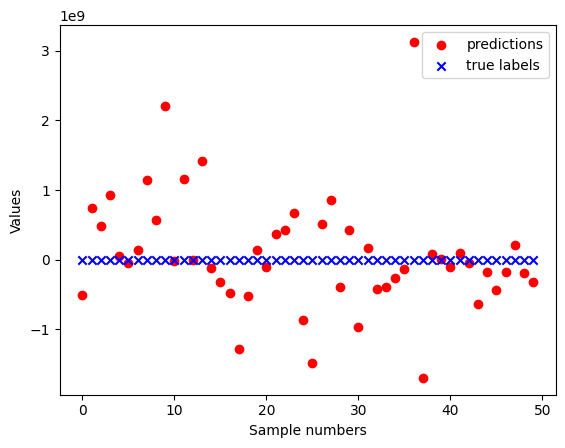

In [47]:
plot_predictions(y_test_pred[:50], y_test[:50])

### Task 2 - Evaluate the regression model performance

In [51]:
# Use sklearn to compute the key measures of performance for your regression model. 
# That should include the RMSE, and R^2 for both the training and test sets.

# MSE for training and test sets.

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE for train set: {MSE_train} | "f"MSE for test set: {MSE_test}")


MSE for train set: 7.494133552919852e+17 | MSE for test set: 5.831731824324447e+17


In [52]:
# RMSE for both the training and test sets

RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"RMSE for train set: {RMSE_train} | "f"RMSE for test set: {RMSE_test}")



RMSE for train set: 865686638.046346 | RMSE for test set: 763657765.253811


In [54]:
# MAE for both the training and test sets

from sklearn.metrics import mean_absolute_error

MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)

print(f"MAE for train set: {MAE_train} | "f"MAE for test set: {MAE_test}")


MAE for train set: 596761806.6588314 | MAE for test set: 530103898.94487834


In [55]:
# R2 for both the training and test sets

from sklearn.metrics import r2_score

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

print(f"R2 for train set: {R2_train} | "f"R2 for test set: {R2_test}")



R2 for train set: -36347033718035.555 | R2 for test set: -80826007116118.6


### Task 3 - Implement a custom function to tune the hyperparameters of the model


In [22]:
# Function created with Ahmad.

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import itertools

def custom_tune_regression_model_hyperparameters(model_type, X_train, y_train, X_validation, y_validation, grid_dict):
        keys, values = zip(*grid_dict.items())
        iteration_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]
        RMSE_list = []

        for iteration in iteration_dicts:
                model = model_type(learning_rate=iteration['learning_rate'], max_iter=iteration['max_iter'])
                model.fit(X_train, y_train)
                # y_train_pred = model.predict(X_train)
                # train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)
                y_validation_pred = model.predict(X_validation)
                validation_RMSE = mean_squared_error(y_validation, y_validation_pred, squared=False)
                validation_MAE = mean_absolute_error(y_validation, y_validation_pred)
                validation_R2 = r2_score(y_validation, y_validation_pred)
                RMSE_list.append(validation_RMSE)
                print(f"This iteration RMSE is {validation_RMSE}")
                if validation_RMSE <= min(RMSE_list):
                        best_model = model
                        best_iteration_parameters = iteration
                        best_validation_RMSE = validation_RMSE
                        best_validation_MAE = validation_MAE
                        best_validation_R2 = validation_R2
                        print(f"The best RMSE is {best_validation_RMSE}")
                        performance_metrics = {'validation RMSE': best_validation_RMSE, 'validation MAE': best_validation_MAE, 'validation R2': best_validation_R2}
        return best_model, performance_metrics, best_iteration_parameters
        

        # for lr, mi in zip(learning_rate, max_iter):
        #         print(f"Evaluating model with learning rate {lr:.3f}"
        #                 f" and max iter {mi}... ", end="")
        #         model = model(learning_rate=lr, max_iter=mi)
        #         model.fit(X_train, y_train)
        #         train_RMSE = mean_squared_error(y_validation, y_validation_pred, squared=False)
        #         validation_RMSE = mean_squared_error(y_validation, y_validation_pred, squared=False)
                
        #         train_MAE = mean_absolute_error(y_train, y_train_pred)
        #         validation_MAE = mean_absolute_error(y_validation, y_validation_pred)

        #         train_R2 = r2_score(y_train, y_train_pred)
        #         validation_R2 = r2_score(y_validation, y_validation_pred)

        #         print(f"score: {validation_RMSE:.3f}")
        #         RMSE_list.append(validation_RMSE)


        # if validation_RMSE <= min(RMSE_list):
        #         best_model = model
        #         best_parameters = {'learning rate': lr, 'maximum iterations': mi}
        #         performance_metrics = {'validation RMSE': validation_RMSE, 'validation MAE': validation_MAE, 'validation R2': validation_R2}
        

        


In [23]:
from sklearn.linear_model import SGDRegressor

grid_dict = {'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'max_iter': [500, 1000, 1500, 2000]}

best_model, performance_metrics, best_iteration_parameters = custom_tune_regression_model_hyperparameters(SGDRegressor, X_train, y_train, X_validation, y_validation, grid_dict)
print(f"The best model is {best_model}")
print(f"The best_parameters are {best_iteration_parameters}")
print(f"The best performance_metrics are {performance_metrics}")

This iteration RMSE is 4328569940652.859
The best RMSE is 4328569940652.859
This iteration RMSE is 1103488801737.1965
The best RMSE is 1103488801737.1965
This iteration RMSE is 7525679615586.692
This iteration RMSE is 16438753024463.701
This iteration RMSE is 183570106541665.25
This iteration RMSE is 182586250972783.06
This iteration RMSE is 217314842414220.6
This iteration RMSE is 148560332995700.2
This iteration RMSE is 11116752504.035498
The best RMSE is 11116752504.035498
This iteration RMSE is 6119966332.074642
The best RMSE is 6119966332.074642
This iteration RMSE is 20051905304.530064
This iteration RMSE is 39946048047.6127
This iteration RMSE is 5900308471.370469
The best RMSE is 5900308471.370469
This iteration RMSE is 9751892986.045216
This iteration RMSE is 6008521255.447126
This iteration RMSE is 5361455238.290989
The best RMSE is 5361455238.290989
The best model is SGDRegressor(learning_rate='adaptive', max_iter=2000)
The best_parameters are {'learning_rate': 'adaptive', '

/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [32]:
# Function expanded to include more parameters.

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import itertools

def custom_tune_regression_model_hyperparameters(model_type, X_train, y_train, X_validation, y_validation, grid_dict):
        keys, values = zip(*grid_dict.items())
        iteration_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]
        RMSE_list = []

        for iteration in iteration_dicts:
                model = model_type(learning_rate=iteration['learning_rate'], max_iter=iteration['max_iter'], loss=iteration['loss'], fit_intercept=iteration['fit_intercept'], alpha=iteration['alpha'])
                model.fit(X_train, y_train)
                # y_train_pred = model.predict(X_train)
                # train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)
                y_validation_pred = model.predict(X_validation)
                validation_RMSE = mean_squared_error(y_validation, y_validation_pred, squared=False)
                validation_MAE = mean_absolute_error(y_validation, y_validation_pred)
                validation_R2 = r2_score(y_validation, y_validation_pred)
                RMSE_list.append(validation_RMSE)
                print(f"This iteration RMSE is {validation_RMSE}")
                if validation_RMSE <= min(RMSE_list):
                        best_model = model
                        best_iteration_parameters = iteration
                        best_validation_RMSE = validation_RMSE
                        best_validation_MAE = validation_MAE
                        best_validation_R2 = validation_R2
                        print(f"The best RMSE is {best_validation_RMSE}")
                        performance_metrics = {'validation RMSE': best_validation_RMSE, 'validation MAE': best_validation_MAE, 'validation R2': best_validation_R2}
        return best_model, performance_metrics, best_iteration_parameters

In [33]:
# Function expanded to include more parameters.

from sklearn.linear_model import SGDRegressor

grid_dict = {'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'max_iter': [500, 1000, 1500, 2000, 2500, 3000], 'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'fit_intercept' : [True, False], 'alpha': [0.00005,0.0001, 0.00015, 0.0002]}

best_model, performance_metrics, best_iteration_parameters = custom_tune_regression_model_hyperparameters(SGDRegressor, X_train, y_train, X_validation, y_validation, grid_dict)
print(f"The best model is {best_model}")
print(f"The best_parameters are {best_iteration_parameters}")
print(f"The best performance_metrics are {performance_metrics}")

This iteration RMSE is 10893931350127.504
The best RMSE is 10893931350127.504
This iteration RMSE is 4342936337923.8257
The best RMSE is 4342936337923.8257
This iteration RMSE is 4276456576482.9097
The best RMSE is 4276456576482.9097
This iteration RMSE is 4285329540832.5894
This iteration RMSE is 8186677805067.105
This iteration RMSE is 8330526082799.311
This iteration RMSE is 1626855040110.441
The best RMSE is 1626855040110.441
This iteration RMSE is 9229967156340.092
This iteration RMSE is 90.61228249356908
The best RMSE is 90.61228249356908
This iteration RMSE is 91.98163742382634
This iteration RMSE is 89.74886128266358
The best RMSE is 89.74886128266358
This iteration RMSE is 90.9710297245212
This iteration RMSE is 88.89978915729395
The best RMSE is 88.89978915729395
This iteration RMSE is 88.29361786840458
The best RMSE is 88.29361786840458
This iteration RMSE is 92.37504789035458
This iteration RMSE is 91.669948789741
This iteration RMSE is 89.35570115253773
This iteration RMSE

/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: Convergenc

This iteration RMSE is 5986070415.773586
This iteration RMSE is 3676401721.992122
This iteration RMSE is 16067751031.474663
This iteration RMSE is 6869151358.150223
This iteration RMSE is 90.92593522856727
This iteration RMSE is 89.91687418277472
This iteration RMSE is 90.15036834597163
This iteration RMSE is 90.90952759758532
This iteration RMSE is 89.79290490385736
This iteration RMSE is 91.30335938559458
This iteration RMSE is 90.71577195612568
This iteration RMSE is 89.06362506352843
This iteration RMSE is 83.77690130363453
This iteration RMSE is 82.9511250198557
This iteration RMSE is 83.80726665976873
This iteration RMSE is 83.33970842598212
This iteration RMSE is 83.58355205023159
This iteration RMSE is 84.48750775138376
This iteration RMSE is 83.35680523760986
This iteration RMSE is 84.2145505586292
This iteration RMSE is 2035609365.4896922
This iteration RMSE is 5719140860.474113
This iteration RMSE is 6274854945.530451
This iteration RMSE is 7098966391.100764
This iteration R

/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


This iteration RMSE is 2410415951.858852
This iteration RMSE is 4670929275.446767
This iteration RMSE is 4093192385.20585
This iteration RMSE is 13702973335.037174
This iteration RMSE is 7611129526.420126
This iteration RMSE is 9362061530.09739
This iteration RMSE is 90.78403100673462
This iteration RMSE is 87.95886212967052
This iteration RMSE is 89.26938115542606
This iteration RMSE is 90.21796354260601
This iteration RMSE is 88.76124930421561
This iteration RMSE is 91.47590315034786
This iteration RMSE is 89.62906045849999
This iteration RMSE is 88.68778414492013
This iteration RMSE is 83.74145104026378
This iteration RMSE is 83.95202001079426
This iteration RMSE is 84.44650928090815
This iteration RMSE is 83.81309649020045
This iteration RMSE is 84.0977337651014
This iteration RMSE is 83.71498701288988
This iteration RMSE is 83.91206627799697
This iteration RMSE is 84.39580587109361
This iteration RMSE is 3652570162.753575
This iteration RMSE is 8685903345.31008
This iteration RMSE

/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


This iteration RMSE is 90.08957999218453
This iteration RMSE is 89.8547898845246
This iteration RMSE is 89.07474973708904
This iteration RMSE is 89.03934563771341
This iteration RMSE is 90.4052105706219
This iteration RMSE is 89.97933492757382
This iteration RMSE is 89.01040424676964
This iteration RMSE is 89.41943131726737
This iteration RMSE is 84.10025559895159
This iteration RMSE is 83.60422042958716
This iteration RMSE is 83.67959091700249
This iteration RMSE is 84.7987432657484
This iteration RMSE is 83.52188563300457
This iteration RMSE is 83.975955339551
This iteration RMSE is 83.81506000097609
This iteration RMSE is 85.01150620309582
This iteration RMSE is 6641182869.631543
This iteration RMSE is 7350949971.422964
This iteration RMSE is 4473987243.027995
This iteration RMSE is 4653687105.664694
This iteration RMSE is 5646010547.961758
This iteration RMSE is 11445589946.581043
This iteration RMSE is 7796171880.650318
This iteration RMSE is 8833312889.971676
This iteration RMSE 

/Users/apple/Documents/GitHub/Data_Science_Airbnb/airbnb_venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


This iteration RMSE is 89.36973284431015
This iteration RMSE is 90.3638007456342
This iteration RMSE is 91.01698916345637
This iteration RMSE is 84.95967702545192
This iteration RMSE is 83.93956606106033
This iteration RMSE is 84.15405889130056
This iteration RMSE is 83.6223927539739
This iteration RMSE is 83.5470709726362
This iteration RMSE is 82.57434094368475
This iteration RMSE is 83.95682451807227
This iteration RMSE is 84.29304884855259
This iteration RMSE is 10666345620.571003
This iteration RMSE is 10332501711.21057
This iteration RMSE is 8699146311.295732
This iteration RMSE is 6649719323.844502
This iteration RMSE is 13766418978.328917
This iteration RMSE is 8862851591.56923
This iteration RMSE is 12381804009.26296
This iteration RMSE is 7401149580.479181
This iteration RMSE is 6716812589.299486
This iteration RMSE is 8562450198.961484
This iteration RMSE is 6202176640.808231
This iteration RMSE is 4005437379.4803643
This iteration RMSE is 9432557916.477852
This iteration RM

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import itertools


learning_rate = [0.01, 0.1, 1, 10]
max_iter = [500, 1000, 1500, 2000]



In [30]:
grid_dict = {'learning rate': [0.01, 0.1, 1, 10], 'max_iter': [500, 1000, 1500, 2000]}
import itertools

keys, values = zip(*grid_dict.items())
iteration_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]

print(iteration_dicts)

for iteration in iteration_dicts:
    print(iteration['max_iter'])


[{'learning rate': 0.01, 'max_iter': 500}, {'learning rate': 0.01, 'max_iter': 1000}, {'learning rate': 0.01, 'max_iter': 1500}, {'learning rate': 0.01, 'max_iter': 2000}, {'learning rate': 0.1, 'max_iter': 500}, {'learning rate': 0.1, 'max_iter': 1000}, {'learning rate': 0.1, 'max_iter': 1500}, {'learning rate': 0.1, 'max_iter': 2000}, {'learning rate': 1, 'max_iter': 500}, {'learning rate': 1, 'max_iter': 1000}, {'learning rate': 1, 'max_iter': 1500}, {'learning rate': 1, 'max_iter': 2000}, {'learning rate': 10, 'max_iter': 500}, {'learning rate': 10, 'max_iter': 1000}, {'learning rate': 10, 'max_iter': 1500}, {'learning rate': 10, 'max_iter': 2000}]
500
1000
1500
2000
500
1000
1500
2000
500
1000
1500
2000
500
1000
1500
2000


In [19]:
print(keys, values)

('learning rate', 'max_iter') ([0.01, 0.1, 1, 10], [500, 1000, 1500, 2000])


In [24]:
keys, values = zip(*grid_dict.items())

print(keys, values)

('learning rate', 'max_iter') ([0.01, 0.1, 1, 10], [500, 1000, 1500, 2000])


In [25]:
iteration_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]



In [26]:
for v in itertools.product(*values):
    print(v)


(0.01, 500)
(0.01, 1000)
(0.01, 1500)
(0.01, 2000)
(0.1, 500)
(0.1, 1000)
(0.1, 1500)
(0.1, 2000)
(1, 500)
(1, 1000)
(1, 1500)
(1, 2000)
(10, 500)
(10, 1000)
(10, 1500)
(10, 2000)


In [27]:
iteration_dicts = []
for v in itertools.product(*values):
    d = dict(zip(keys,v))
    iteration_dicts.append(d)

print(iteration_dicts)

[{'learning rate': 0.01, 'max_iter': 500}, {'learning rate': 0.01, 'max_iter': 1000}, {'learning rate': 0.01, 'max_iter': 1500}, {'learning rate': 0.01, 'max_iter': 2000}, {'learning rate': 0.1, 'max_iter': 500}, {'learning rate': 0.1, 'max_iter': 1000}, {'learning rate': 0.1, 'max_iter': 1500}, {'learning rate': 0.1, 'max_iter': 2000}, {'learning rate': 1, 'max_iter': 500}, {'learning rate': 1, 'max_iter': 1000}, {'learning rate': 1, 'max_iter': 1500}, {'learning rate': 1, 'max_iter': 2000}, {'learning rate': 10, 'max_iter': 500}, {'learning rate': 10, 'max_iter': 1000}, {'learning rate': 10, 'max_iter': 1500}, {'learning rate': 10, 'max_iter': 2000}]
